In [6]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv("C:/Users/SHUBHAM/Desktop/data/sensor/sensordata.csv")
data.shape

(168697, 6)

In [8]:
data.head()

,Timestamp,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Label
0,21-02-2020 12:35,2.79,2.78,1159.0,9.0,High Speed Normal
1,21-02-2020 12:35,2.84,2.78,1159.0,9.0,High Speed Normal
2,21-02-2020 12:35,2.82,2.80,1159.0,9.0,High Speed Normal
3,21-02-2020 12:35,2.81,2.80,1159.0,9.0,High Speed Normal
4,21-02-2020 12:35,2.82,2.76,1159.0,9.0,High Speed Normal


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168697 entries, 0 to 168696
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  168697 non-null  object 
 1   Sensor 1   168697 non-null  float64
 2   Sensor 2   168697 non-null  float64
 3   Sensor 3   168697 non-null  float64
 4   Sensor 4   168697 non-null  float64
 5   Label      168697 non-null  object 
dtypes: float64(4), object(2)
memory usage: 7.7+ MB


In [10]:
data["Label"].value_counts()

High Speed Normal              102696
Medium Speed Normal             65833
Low Speed High Vibration          126
Low Speed Normal                   31
Medium Speed High Vibration         5
High Speed High Current             4
High Speed High Vibration           2
Name: Label, dtype: int64

In [11]:
data.describe()


,Sensor 1,Sensor 2,Sensor 3,Sensor 4
count,168697.000000,168697.000000,168697.000000,168697.000000
mean,2.340096,2.348681,1168.297024,8.553074
std,0.614607,0.596306,36.957278,1.234726
min,1.470000,1.130000,605.000000,0.000000
25%,1.560000,1.610000,1148.000000,7.000000
50%,2.770000,2.780000,1159.000000,9.000000
75%,2.820000,2.820000,1209.000000,10.000000
max,8.820000,3.790000,1261.000000,13.000000


In [12]:
columns=[col for col in data.columns if not col.find('Sensor') ]
columns

['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4']

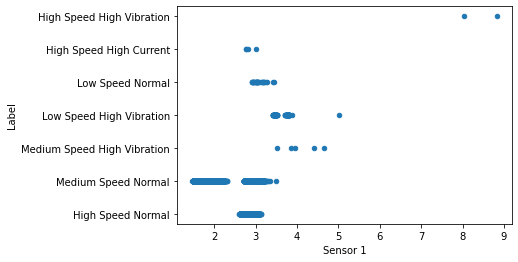

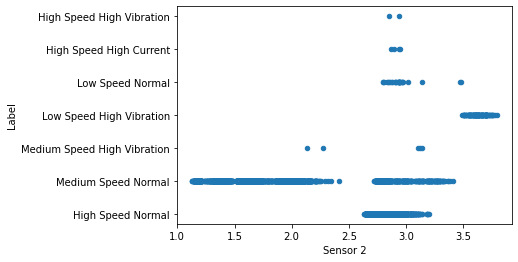

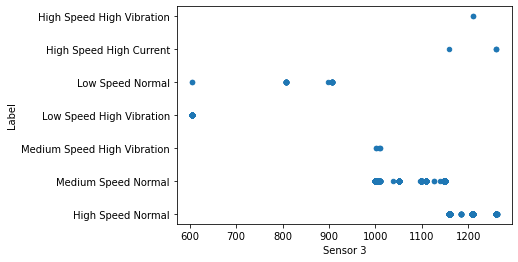

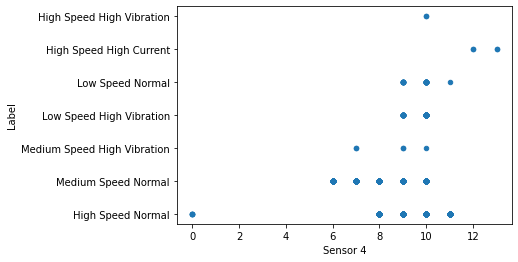

In [13]:
for col in columns:
    data.plot.scatter(x=col,y='Label')

In [14]:
corr=data.corr()
corr

,Sensor 1,Sensor 2,Sensor 3,Sensor 4
Sensor 1,1.000000,0.992006,0.424558,0.918957
Sensor 2,0.992006,1.000000,0.460436,0.921139
Sensor 3,0.424558,0.460436,1.000000,0.480065
Sensor 4,0.918957,0.921139,0.480065,1.000000


In [15]:
classes=data['Label'].unique()
classes

array(['High Speed Normal', 'Medium Speed Normal',
       'Medium Speed High Vibration', 'Low Speed High Vibration',
       'Low Speed Normal', 'High Speed High Current',
       'High Speed High Vibration'], dtype=object)

In [16]:
data=data.drop(['Timestamp'], axis=1)

In [17]:
h_s_n=data[data.Label=='High Speed Normal']
m_s_n=data[data.Label=='Medium Speed Normal']
m_s_h_v=data[data.Label=='Medium Speed High Vibration']
l_s_h_v=data[data.Label=='Low Speed High Vibration']
l_s_n=data[data.Label=='Low Speed Normal']
h_s_h_c=data[data.Label=='High Speed High Current']
h_s_h_v=data[data.Label=='High Speed High Vibration']
m_s_h_v.shape

(5, 5)

# Kmean Clustering


In [19]:
kmeandata=data.drop(['Label'], axis=1)
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(kmeandata)
kmeandata=pd.DataFrame(std_data, columns=columns)
from sklearn.decomposition import PCA
from sklearn import decomposition
pcaa = PCA(n_components=2)
X = pcaa.fit_transform(kmeandata)
print(pcaa.explained_variance_ratio_)
print(X)
print(X.shape)

[0.79349494 0.17942786]
[[ 0.90274319  0.61192656]
 [ 0.94695975  0.63196488]
 [ 0.94764448  0.63063565]
 ...
 [-3.10429783  3.6781379 ]
 [-3.10464019  3.67880252]
 [-3.10429783  3.6781379 ]]
(168697, 2)


In [20]:
print(data)
print(data.describe())
print(kmeandata)

        Sensor 1  Sensor 2  Sensor 3  Sensor 4                Label
0           2.79      2.78    1159.0       9.0    High Speed Normal
1           2.84      2.78    1159.0       9.0    High Speed Normal
2           2.82      2.80    1159.0       9.0    High Speed Normal
3           2.81      2.80    1159.0       9.0    High Speed Normal
4           2.82      2.76    1159.0       9.0    High Speed Normal
...          ...       ...       ...       ...                  ...
168692      2.06      1.18    1000.0       8.0  Medium Speed Normal
168693      2.07      1.15    1001.0       8.0  Medium Speed Normal
168694      2.06      1.18    1001.0       8.0  Medium Speed Normal
168695      2.07      1.17    1001.0       8.0  Medium Speed Normal
168696      2.06      1.18    1001.0       8.0  Medium Speed Normal

[168697 rows x 5 columns]
            Sensor 1       Sensor 2       Sensor 3       Sensor 4
count  168697.000000  168697.000000  168697.000000  168697.000000
mean        2.340096     

## PCA-loadings:

In [21]:
loadings=pcaa.components_
print(loadings)

[[ 0.54351435  0.54774608  0.34075225  0.53707941]
 [ 0.24631304  0.19934737 -0.93772127  0.14237042]]


In [26]:
from sklearn.cluster import KMeans
k=7 #number of cluster
kmeans=KMeans(n_clusters=k)
kmeans.fit(X)



KMeans(n_clusters=7)

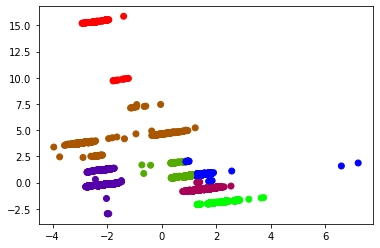

In [27]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='brg')

In [28]:
SSE = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(kmeans.inertia_)

656516.6342886896
137809.75139144572
71687.40526789447
39125.96040875494
23643.550842154615
13393.454888689572
9903.135530095014
7727.0765320949695
5836.158119322832


Text(0, 0.5, 'SEE')

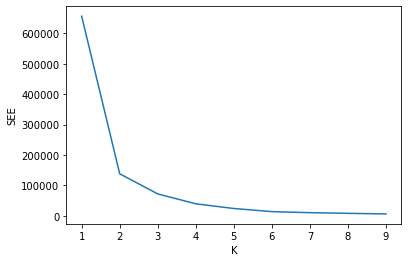

In [29]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SEE')

In [30]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='black', label ='Cluster 6')
plt.scatter(X[y_kmeans==6, 0], X[y_kmeans==6, 1], s=100, c='grey', label ='Cluster 7')
plt.scatter(centroids[:, 0], centroids[:, 1], s=20, c='yellow', label = 'Centroids')
plt.title('Clusters of operation modes')
#plt.scatter(X[50297][0], X[50297][1], s=50, c='brown', label ='Cluster 1')

plt.show()


NameError: name 'y_kmeans' is not defined

In [33]:
centroids=kmeans.cluster_centers_
print(centroids)

[[ 1.84259552 -0.54458829]
 [-2.18689986 -0.20404053]
 [ 0.9685562   0.65259901]
 [-2.89736078  3.62289893]
 [-2.32430333 15.38198288]
 [ 2.13471268 -1.87156035]
 [ 1.44930019  0.77478731]
 [-0.06505399  5.13966491]
 [ 1.38038232 -0.6629308 ]]


In [23]:
unique,count=np.unique(y_kmeans, return_counts=True)
print(np.asarray((unique, count)).T)

[[    0 38334]
 [    1 64273]
 [    2  1292]
 [    3 33682]
 [    4 24604]
 [    5   142]
 [    6  6370]]


In [24]:
reduced_data=pd.DataFrame(X, columns=['X','Y'])
reduced_data['cluster']=y_kmeans
cluster={}
cluster[0]=reduced_data[reduced_data.cluster==0].values
cluster[1]=reduced_data[reduced_data.cluster==1].values
cluster[2]=reduced_data[reduced_data.cluster==2].values
cluster[3]=reduced_data[reduced_data.cluster==3].values
cluster[4]=reduced_data[reduced_data.cluster==4].values
cluster[5]=reduced_data[reduced_data.cluster==5].values
cluster[6]=reduced_data[reduced_data.cluster==6].values




In [25]:
import math
def maxdistpoint(k,df):
    maxx=0
    #print(df)
    for i in range(len(df)):
        dist=math.sqrt(pow(centroids[k][0]-df[i][0],2)+pow(centroids[k][1]-df[i][1],2))
        maxx=max(maxx,dist)
        
    return maxx


In [26]:
radius=[]
for i in range(0,7):
    print("For centroid :",centroids[i])
    maxx=maxdistpoint(i,cluster[i])
    radius.append(maxx)
    print(maxx)
    
    




For centroid : [ 1.62300744 -0.60083277]
0.9564171663325923
For centroid : [-2.18689986 -0.20404053]
2.788175733724708
For centroid : [-2.39459547  3.83291676]
4.318948685224209
For centroid : [0.96764786 0.65322029]
1.9851545826292265
For centroid : [1.44822519 0.77325402]
5.860694731460153
For centroid : [-2.24804402 14.83259245]
5.140272242363994
For centroid : [ 2.13471268 -1.87156035]
1.6640428385139765


In [27]:
for i in range(0,7):
    print(radius[i])

0.9564171663325923
2.788175733724708
4.318948685224209
1.9851545826292265
5.860694731460153
5.140272242363994
1.6640428385139765


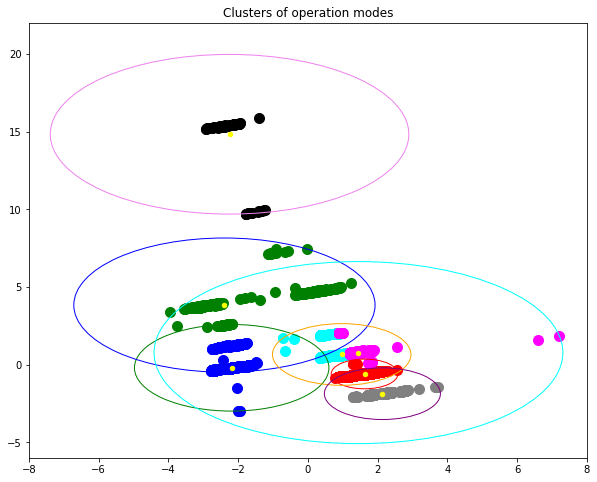

In [28]:
color=['red','green','blue', 'orange','cyan', 'violet', 'purple']
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,8)
fig, ax = plt.subplots()
    
    


plt.xlim([-8,8])
plt.ylim([-6,22])
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='black', label ='Cluster 6')
plt.scatter(X[y_kmeans==6, 0], X[y_kmeans==6, 1], s=100, c='grey', label ='Cluster 7')
plt.scatter(centroids[:, 0], centroids[:, 1], s=20, c='yellow', label = 'Centroids')

for i in range(0,7):
    circle1 = plt.Circle((centroids[i][0], centroids[i][1]), radius[i] , color=color[i],fill= False)
    ax.add_artist(circle1)
plt.title('Clusters of operation modes')

#plt.scatter(X[50297][0], X[50297][1], s=50, c='brown', label ='Cluster 1')

plt.show()

In [29]:
#import random
#print (random.randrange(14.5,100))
#sensor1_test=[]
#sensor2_test=[]
#sensor3_test=[]
#sensor4_test=[]
#for i in range(0,60):
 #   sens1=random.randrange(0,10)
  #  sensor1_test.append(sens1)
   # sens2=random.randrange(0,5)
    #sensor2_test.append(sens2)
   # sens3=random.randrange(531,1334)
   # sensor3_test.append(sens3)
    #sens4=random.randrange(0,15)
    #sensor4_test.append(sens4)
    
#print(sensor1_test)
#print(sensor2_test)
#print(sensor3_test)
#print(sensor4_test)

In [30]:
#dataframe=pd.DataFrame({'sensor1':sensor1_test,'sensor2':sensor2_test,'sensor3':sensor3_test,"sensor4":sensor4_test})
#dataframe.head(20)

In [31]:
dataframe=pd.read_csv("C:/Users/SHUBHAM/Desktop/data/sensor/newdata.csv")

In [32]:
newdata=dataframe.values

newdata=newdata.astype(float)
newdata

array([[3.000e+00, 1.000e+00, 7.290e+02, 9.000e+00],
       [7.000e+00, 4.000e+00, 9.800e+02, 7.000e+00],
       [8.000e+00, 2.000e+00, 6.760e+02, 1.000e+01],
       [5.000e+00, 1.000e+00, 1.131e+03, 4.000e+00],
       [4.000e+00, 1.000e+00, 5.830e+02, 2.000e+00],
       [2.000e+00, 1.000e+00, 9.380e+02, 6.000e+00],
       [5.000e+00, 4.000e+00, 5.900e+02, 2.000e+00],
       [6.000e+00, 1.000e+00, 9.950e+02, 4.000e+00],
       [8.000e+00, 3.000e+00, 6.190e+02, 2.000e+00],
       [7.000e+00, 3.000e+00, 7.250e+02, 1.000e+01],
       [1.000e+00, 2.000e+00, 6.210e+02, 0.000e+00],
       [8.000e+00, 3.000e+00, 9.430e+02, 6.000e+00],
       [6.000e+00, 2.000e+00, 5.710e+02, 9.000e+00],
       [4.000e+00, 0.000e+00, 1.142e+03, 0.000e+00],
       [0.000e+00, 1.000e+00, 8.590e+02, 0.000e+00],
       [4.000e+00, 3.000e+00, 1.187e+03, 8.000e+00],
       [1.000e+00, 4.000e+00, 1.192e+03, 1.400e+01],
       [9.000e+00, 0.000e+00, 9.240e+02, 0.000e+00],
       [2.000e+00, 2.000e+00, 1.048e+03, 1.000

In [33]:
ddescribe=data.describe()

ddescribe=ddescribe.values.tolist()
data_mean=ddescribe[1]
data_stdiv=ddescribe[2]
print(data_mean)
print(data_stdiv)
print(loadings)


[2.340095970882707, 2.348681126516773, 1168.2970236578008, 8.553074447085603]
[0.6146067533352249, 0.5963061845451072, 36.957278352448256, 1.2347256369347526]
[[ 0.54351435  0.54774608  0.34075225  0.53707941]
 [ 0.24631304  0.19934737 -0.93772127  0.14237042]]


In [34]:
for i in range(len(newdata)):
    for j in range(0,4):
        newdata[i][j]=float((newdata[i][j]-data_mean[j])/data_stdiv[j])
print(newdata)
#kya bolra hai awaj cut cut ke aari hai

[[  1.07370123  -2.26172587 -11.88661728   0.36196345]
 [  7.5819278    2.7692466   -5.09499162  -1.25782959]
 [  9.20898444  -0.58473505 -13.32070557   1.17185997]
 [  4.32781452  -2.26172587  -1.00919292  -3.68751916]
 [  2.70075788  -2.26172587 -15.83712464  -5.30731221]
 [ -0.55335541  -2.26172587  -6.23143895  -2.06772612]
 [  4.32781452   2.7692466  -15.64771675  -5.30731221]
 [  5.95487116  -2.26172587  -4.68911758  -3.68751916]
 [  9.20898444   1.09225577 -14.86302694  -5.30731221]
 [  7.5819278    1.09225577 -11.99485036   1.17185997]
 [ -2.18041205  -0.58473505 -14.8089104   -6.92710525]
 [  9.20898444   1.09225577  -6.0961476   -2.06772612]
 [  5.95487116  -0.58473505 -16.16182388   0.36196345]
 [  2.70075788  -3.9387167   -0.71155195  -6.92710525]
 [ -3.80746869  -2.26172587  -8.36904224  -6.92710525]
 [  2.70075788   1.09225577   0.50607018  -0.44793307]
 [ -2.18041205   2.7692466    0.64136152   4.41144607]
 [ 10.83604108  -3.9387167   -6.61025472  -6.92710525]
 [ -0.5533

In [35]:
newdatakmean=[]

for i in range(len(newdata)):
    a=0
    b=0
    for j in range(0,4):
        a+=newdata[i][j]*loadings[0][j]
        b+=newdata[i][j]*loadings[1][j]
    newdatakmean.append([a,b])
        

In [36]:
print(newdatakmean)
kmeans.predict([newdatakmean[9]])

[[-4.511267896331884, 11.011464219492398], [3.226046323594264, 7.018173981801036], [0.7752503784293925, 14.809674635161935], [-1.210997519913429, 1.0364760478760102], [-8.017934724383334, 14.309567120271389], [-4.7735180285776995, 4.961802040527721], [-4.313369489451475, 15.535631732965346], [-1.580611484198873, 4.887984929593061], [-2.311563895877976, 15.667803466845378], [1.2612750271772883, 13.49993046458343], [-10.271946668597604, 12.246786082505041], [2.4156849261711733, 7.908135469873097], [-2.396503094466622, 16.557015868797304], [-4.6523844474540565, -0.4389184120497298], [-9.88044089573637, 5.4729157667866195], [1.9980484087597101, 0.344645008693749], [2.9196009247076162, 0.041619194955070826], [-2.2407374833034623, 7.096246932360531], [-5.0156283177419585, 1.9285366036535976], [6.588847880793402, 2.748137382482405], [-7.758345051343772, 13.413249938754138], [-0.37606758895791437, 9.32072208146708], [-5.610304518239014, 11.229311516991428], [-4.880793600093439, -2.561455192274

array([4])

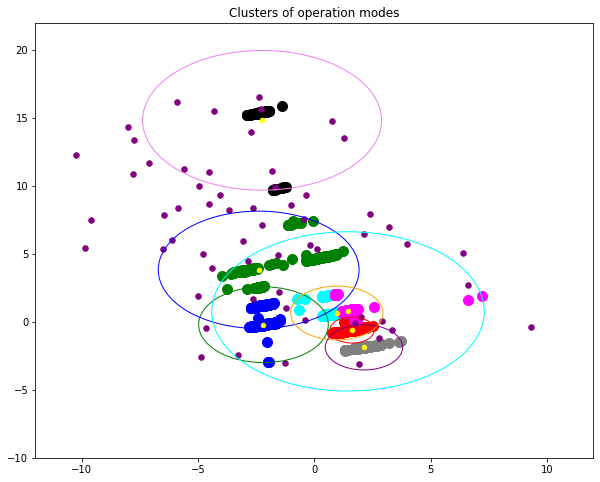

In [37]:
color=['red','green','blue', 'orange','cyan', 'violet', 'purple']
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,8)
fig, ax = plt.subplots()
    
    


plt.xlim([-12,12])
plt.ylim([-10,22])
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='black', label ='Cluster 6')
plt.scatter(X[y_kmeans==6, 0], X[y_kmeans==6, 1], s=100, c='grey', label ='Cluster 7')
plt.scatter(centroids[:, 0], centroids[:, 1], s=20, c='yellow', label = 'Centroids')
for i in range(len(newdatakmean)):
    plt.scatter(newdatakmean[i][0], newdatakmean[i][1], s=30, c='purple')

for i in range(0,7):
    circle1 = plt.Circle((centroids[i][0], centroids[i][1]), radius[i] , color=color[i],fill= False)
    ax.add_artist(circle1)
plt.title('Clusters of operation modes')

#plt.scatter(X[50297][0], X[50297][1], s=50, c='brown', label ='Cluster 1')

plt.show()

In [46]:
import math
flagged=[]
flag=[]
label=[]
for i in range(len(newdatakmean)):
    inrange=False
    for j in range(0,7):
        dist=math.sqrt(pow((centroids[j][0]-newdatakmean[i][0]),2)+pow((centroids[j][1]-newdatakmean[i][1]),2))
        if dist-0.5<=radius[j]:
            inrange=True
            flag.append(1)
            label.append(kmeans.predict([newdatakmean[i]])[0])
            break
    if inrange==False:
        flagged.append(newdatakmean[i])
        label.append(None)
        flag.append(0)
print(flagged)
print(label)
dataframe['flag']=np.array(flag)
dataframe['cluster']=np.array(label)


[[3.226046323594264, 7.018173981801036], [-8.017934724383334, 14.309567120271389], [-10.271946668597604, 12.246786082505041], [2.4156849261711733, 7.908135469873097], [-9.88044089573637, 5.4729157667866195], [-7.758345051343772, 13.413249938754138], [-0.37606758895791437, 9.32072208146708], [-4.880793600093439, -2.561455192274967], [-9.592778899653586, 7.487902576749493], [-4.052371062794116, 9.30285499075887], [-7.099781404734661, 11.656447502752865], [-6.470097188937274, 7.871153905025804], [-5.863059992974003, 8.407289160481472], [-0.9827094346509607, 8.575192024543378], [9.337143691428318, -0.4030352538636033], [-7.805063585541232, 10.889401191132208], [-4.5331074250362136, 8.712116645427594], [6.376852637225257, 5.091020293491299]]
[4, None, 4, 1, None, 3, 4, 7, 4, 4, None, None, 4, 1, None, 6, 0, 7, 3, 6, None, None, 4, None, 7, 4, 7, 7, None, None, None, 2, 4, 3, None, None, None, 3, 3, 4, 5, 7, 3, 0, None, 7, 3, 3, 5, 4, 7, None, None, 1, 0, 7, 3, 3, None, 1]
    sensor1  senso

In [47]:
print(dataframe)

    sensor1  sensor2  sensor3  sensor4  flag cluster
0         3        1      729        9     1       4
1         7        4      980        7     0    None
2         8        2      676       10     1       4
3         5        1     1131        4     1       1
4         4        1      583        2     0    None
5         2        1      938        6     1       3
6         5        4      590        2     1       4
7         6        1      995        4     1       7
8         8        3      619        2     1       4
9         7        3      725       10     1       4
10        1        2      621        0     0    None
11        8        3      943        6     0    None
12        6        2      571        9     1       4
13        4        0     1142        0     1       1
14        0        1      859        0     0    None
15        4        3     1187        8     1       6
16        1        4     1192       14     1       0
17        9        0      924        0     1  

[[  3.22604632   7.01817398]
 [ -8.01793472  14.30956712]
 [-10.27194667  12.24678608]
 [  2.41568493   7.90813547]
 [ -9.8804409    5.47291577]
 [ -7.75834505  13.41324994]
 [ -0.37606759   9.32072208]
 [ -4.8807936   -2.56145519]
 [ -9.5927789    7.48790258]
 [ -4.05237106   9.30285499]
 [ -7.0997814   11.6564475 ]
 [ -6.47009719   7.87115391]
 [ -5.86305999   8.40728916]
 [ -0.98270943   8.57519202]
 [  9.33714369  -0.40303525]
 [ -7.80506359  10.88940119]
 [ -4.53310743   8.71211665]
 [  6.37685264   5.09102029]]
881.0482445078168
384.1782629626967
267.7948513757279
152.56161725406372
88.36075393458985
55.43672215613117
33.68769737384312
21.506320442463682
14.645535247253278
9.119174971083394
4.854018203370035
2.782557569212689
2.0581990468702176
1.5153075475031557
1.0533928501418943
0.6180072060259867
0.29003962131325256


Text(0, 0.5, 'SEE')

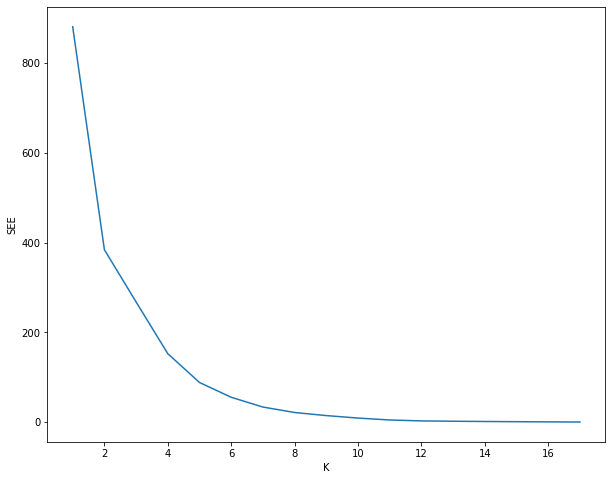

In [262]:

flagged=np.array(flagged)
print(flagged)
SSE = []
index = range(1,len(flagged))
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(flagged)
    SSE.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SEE')


In [263]:
from sklearn.cluster import KMeans
k=4
kmeans=KMeans(n_clusters=k)
kmeans.fit(flagged)


KMeans(n_clusters=4)

In [264]:
y_kmean_newdata=kmeans.predict(flagged)
y_kmean_newdata

array([2, 0, 0, 2, 0, 0, 2, 3, 0, 2, 0, 0, 0, 2, 1, 0, 2, 1])

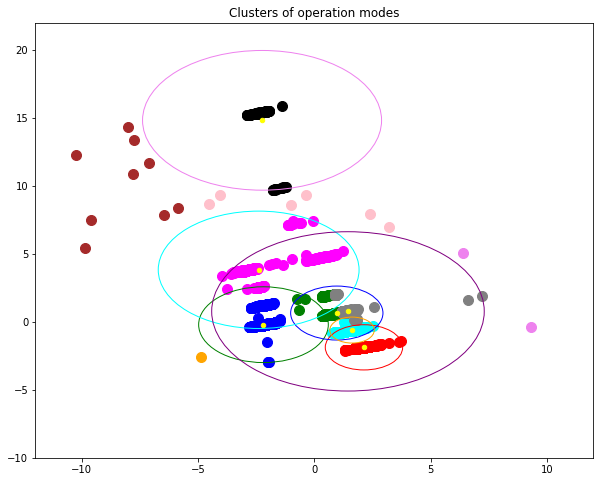

In [265]:
color=['red','green','blue', 'orange','cyan', 'violet', 'purple']
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,8)
fig, ax = plt.subplots()
    
    


plt.xlim([-12,12])
plt.ylim([-10,22])
plt.scatter(flagged[y_kmean_newdata==0, 0], flagged[y_kmean_newdata==0, 1], s=100, c='brown', label ='Cluster 8')
plt.scatter(flagged[y_kmean_newdata==1, 0], flagged[y_kmean_newdata==1, 1], s=100, c='violet', label ='Cluster 9')
plt.scatter(flagged[y_kmean_newdata==2, 0], flagged[y_kmean_newdata==2, 1], s=100, c='pink', label ='Cluster 10')
plt.scatter(flagged[y_kmean_newdata==3, 0], flagged[y_kmean_newdata==3, 1], s=100, c='orange', label ='Cluster 10')

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='black', label ='Cluster 6')
plt.scatter(X[y_kmeans==6, 0], X[y_kmeans==6, 1], s=100, c='grey', label ='Cluster 7')
plt.scatter(centroids[:, 0], centroids[:, 1], s=20, c='yellow', label = 'Centroids')
#for i in range(len(newdatakmean)):
   # plt.scatter(newdatakmean[i][0], newdatakmean[i][1], s=30, c='purple')

for i in range(0,7):
    circle1 = plt.Circle((centroids[i][0], centroids[i][1]), radius[i] , color=color[i],fill= False)
    ax.add_artist(circle1)
plt.title('Clusters of operation modes')

#plt.scatter(X[50297][0], X[50297][1], s=50, c='brown', label ='Cluster 1')

plt.show()